# Ipypixano Jupyter widget



ipypixano Jupyter widget exposes the 2D elements of Pixano Elements in a jupyter notebook. 

Pixano Elements itself is a library of web components dedicated to data annotation task. 

https://github.com/pixano/pixano-elements

Currently the following items are available:

* pxn-rectangle
* pxn-polygon
* pxn-graph
* pxn-segmentation
* pxn-smart-rectangle
* pxn-smart-segmentation
* pxn-smart-segmentation-python



To use ipypixano , just install it with pip



```
pip install ipypixano
```

This notebook presents how to create elements, configure them and how to retrieve annotations data on the python side.


In [1]:
from  ipypixano import Pixano


import json
from ipywidgets import VBox,Text,Layout,Box
from PIL import Image as pImage


For now the package has some limitations and undesirable behaviors:

Keyboard shortcuts used in pixano elements are always active even outside the cell displaying the element. For example,  the 'm', 'p' and 'h' keys will respectively darken, lighten and hide/show the annotations in the element. 

Similarly ctr-C and ctr-V will copy the annotations or the segmentation mask when they are used (in this case use the copy/paste from the context menu displayed by the right mouse button).

Moreover, if the same element is displayed twice, the annotations are lost when the second element is displayed.


## Element creation : 
```
pixano_widget=Pixano(element,image,label_schema)
```
* 'element' : the type of element to create (see list above)
* 'image' : the image to display, image can be a filename (regardless of its location on your disk), a url, a numpy array or an Image loaded by PIL
* label_schema : the descriptions of the annotations categories : name, color, and optionaly properties (see below).For segmentation task you must set the category index (idx) and if it uses instance mode.

In [2]:

my_schema_seg={
  'category': 
     [ 
      {'name': 'person', 'color': '#405b4e',  'idx': 1, 'instance': True,'properties': []},
      {'name': 'bicycle', 'color': '#045e79', 'idx': 2, 'instance': True,'properties': []},
      {'name': 'car', 'color': '#b4ca52', 'idx': 3, 'instance': True,'properties': []},
      {'name': 'motorcycle', 'color': '#2a2072', 'idx': 4, 'instance': True,'properties': []},
      {'name': 'airplane', 'color': '#f0e229', 'idx': 5, 'instance': True,'properties': []},
      {'name': 'bus', 'color': '#0b5c13', 'idx': 6, 'instance': True,'properties': []},
      {'name': 'train', 'color': '#a593bb', 'idx': 7, 'instance': True,'properties': []},
      {'name': 'truck', 'color': '#0da178', 'idx': 8, 'instance': True,'properties': []},
      {'name': 'boat', 'color': '#63ab56', 'idx': 9, 'instance': False,'properties': []},
      {'name': 'traffic light', 'color': '#db6e77', 'idx': 10, 'instance': False,'properties': []},  
     ]
}

my_schema_graph={'vertex_names':['1','2','3'],
                 'edges':[[0, 1], [1, 2]]
                                 }
my_schema_shape={
    'category':
            [ {'name': 'car', 'color': '#3c6127', 'properties': [{"name": 'occluded',    "type": 'checkbox' , "default": False }] },
              {'name': 'bicycle', 'color': '#89c2bc', 'properties': [{ "name": 'model type', "type": 'dropdown' , "enum": ['toyota', 'chery', 'ford'], "default": 'toyota' }]},
              {'name': 'person', 'color': '#971ad2', 'properties': [{ "name": 'color',      "type": 'textfield', "default": 'gray' }]},
              {'name': 'motorcycle', 'color': '#e7e8d1', 'properties': []},
              {'name': 'airplane', 'color': '#df753a', 'properties': []},
              {'name': 'bus', 'color': '#075c52', 'properties': []},
              {'name': 'train', 'color': '#a0da30', 'properties': []},
              {'name': 'truck', 'color': '#7b0915', 'properties': []},
              {'name': 'boat', 'color': '#2567cd', 'properties': []},
              {'name': 'traffic sign', 'color': '#928520', 'properties': []},
              {'name': 'fire hydrant', 'color': '#459511', 'properties': []},
              {'name': 'stop sign', 'color': '#80e278', 'properties': []}]}

In [3]:
w_rect = Pixano(element='rectangle',image='image.jpg',label_schema=my_schema_shape)

w_rect

Pixano(annotations_input=[0], element='pxn-rectangle', image='/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHBwgHBgoICAgL…

In [4]:
annotations=w_rect.annotations
annotations

[]

In [5]:
w_rect.setAnnotations(annotations)

### Loading Annotations

In [4]:
w_rect.load("annotations_shape_cars.json")

### Getting Annotations

Annotations are accesible via the annotations widget's attribute 

In [5]:
w_rect.annotations

[{'id': '0.oe3gp9ab1tj',
  'geometry': {'vertices': [0.36796875,
    0.21666666666666667,
    0.509375,
    0.4013888888888889],
   'type': 'rectangle'},
  'category': 'traffic sign',
  'options': {},
  'color': '#928520'},
 {'id': '0.p78qnvymhch',
  'geometry': {'vertices': [0.553125,
    0.22916666666666666,
    0.69453125,
    0.40694444444444444],
   'type': 'rectangle'},
  'category': 'traffic sign',
  'options': {},
  'color': '#928520'},
 {'id': '0.4t9erth91t',
  'geometry': {'vertices': [0.5140625, 0.4111111111111111, 0.5484375, 0.625],
   'type': 'rectangle'},
  'category': 'traffic sign',
  'options': {},
  'color': '#928520'}]

### Setting annotations

Annotations can be set from python by using the setAnnotations method.

Modify the objects caterogies to see changes in the pixano widget.

Be careful, no validation checking is made when the list is passed to the widget. Annotations that do not respect the label schema may leads to aberrant results

In [6]:
w_rect.setAnnotations([{'id': '0.oe3gp9ab1tj',
  'geometry': {'vertices': [0.36796875,
    0.21666666666666667,
    0.509375,
    0.4013888888888889],
   'type': 'rectangle'},
  'category': 'traffic sign',
  'options': {}},
 {'id': '0.p78qnvymhch',
  'geometry': {'vertices': [0.553125,
    0.22916666666666666,
    0.69453125,
    0.40694444444444444],
   'type': 'rectangle'},
  'category': 'airplane',
  'options': {}},
 {'id': '0.4t9erth91t',
  'geometry': {'vertices': [0.5140625, 0.4111111111111111, 0.5484375, 0.625],
   'type': 'rectangle'},
  'category': 'traffic sign',
  'options': {}}])

### Saving Annotations

The annotations can be directly saved to disk in json format

In [7]:
w_rect.save("annotations_shape_cars_modified.json")

Then the annotations can be loaded directly from files and set in pixano



In [12]:
import cv2
im=cv2.imread("image.jpg")[:,:,::-1]
w_rect2 = Pixano(element='pxn-rectangle',image=im,label_schema=my_schema_shape)
    
display(w_rect2)

with open("annotations_shape_cars.json","r") as f:
    annotations=json.load(f)
    
w_rect2.setAnnotations(annotations)




Pixano(annotations_input=[0], element='pxn-rectangle', image='iVBORw0KGgoAAAANSUhEUgAABQAAAALQCAIAAABAH0oBAAEA…

-------

## Segmentation task 


---

In [13]:
import cv2
img=cv2.imread("traffic.jpg")[:,:,::-1]
w_seg = Pixano(element='pxn-segmentation',image=img,label_schema=my_schema_seg)
w_seg

Pixano(annotations_input=[0], element='pxn-segmentation', image='iVBORw0KGgoAAAANSUhEUgAABkAAAAH0CAIAAADqknYdA…

### Get segmentation mask as numpy array

In [15]:
w_seg.getMask()

### Saving annotations

In [58]:
w_seg.save("annotations_segmentation.json")

### loading annotations

In [16]:
with open("annotations_segmentation.json","r") as f:
    annotations=json.load(f)
w_seg.setAnnotations(annotations)


isinstance(new_annotations,dict) False


### Getting segmentations mask



Segmentation annotations are returned as a mask in ndarray format using the getMask() method.

Mask shape (500, 1600, 4)
Mask unique values : [0 2]


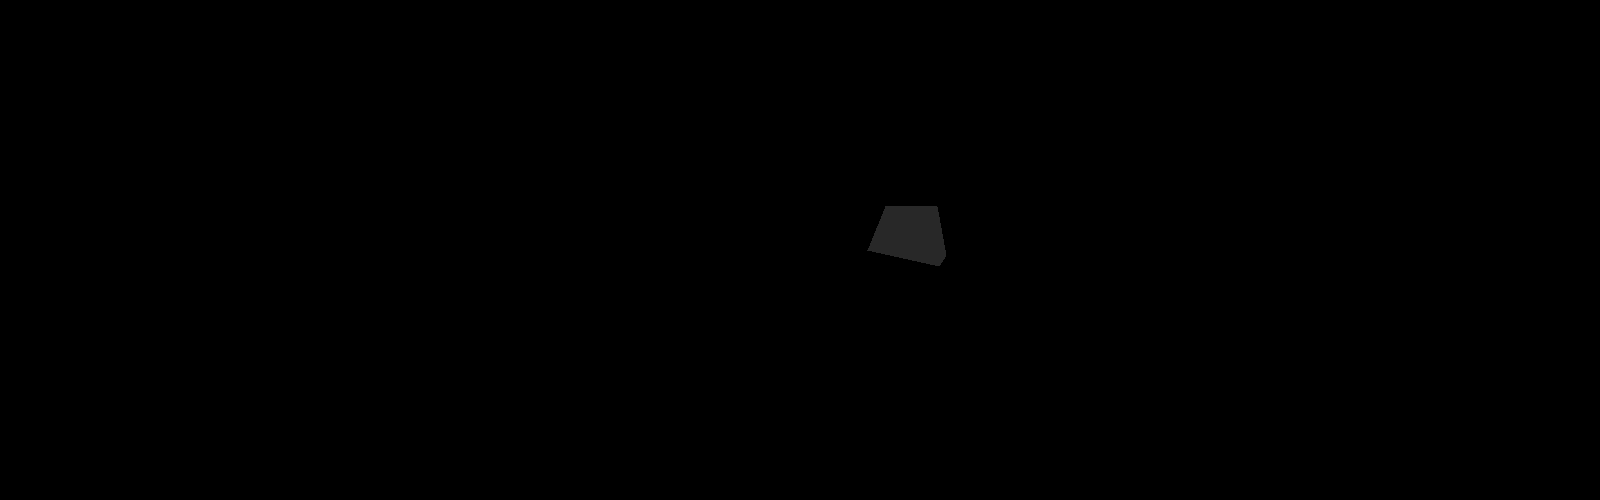

In [61]:

mask=w_seg.getMask()

# for each pixel we got 4 values : [idx, indice_instance_1, indice_instance_2, 255]
print("Mask shape",mask.shape)
print("Mask unique values :",np.unique(mask[:,:,0]))

pImage.fromarray(mask[:,:,0]*20)

### Segmentation mask modification 

Here we change the wrong category (bicycle:2) of an object to the correct one (car:3) 

Mask unique values : [0 3]


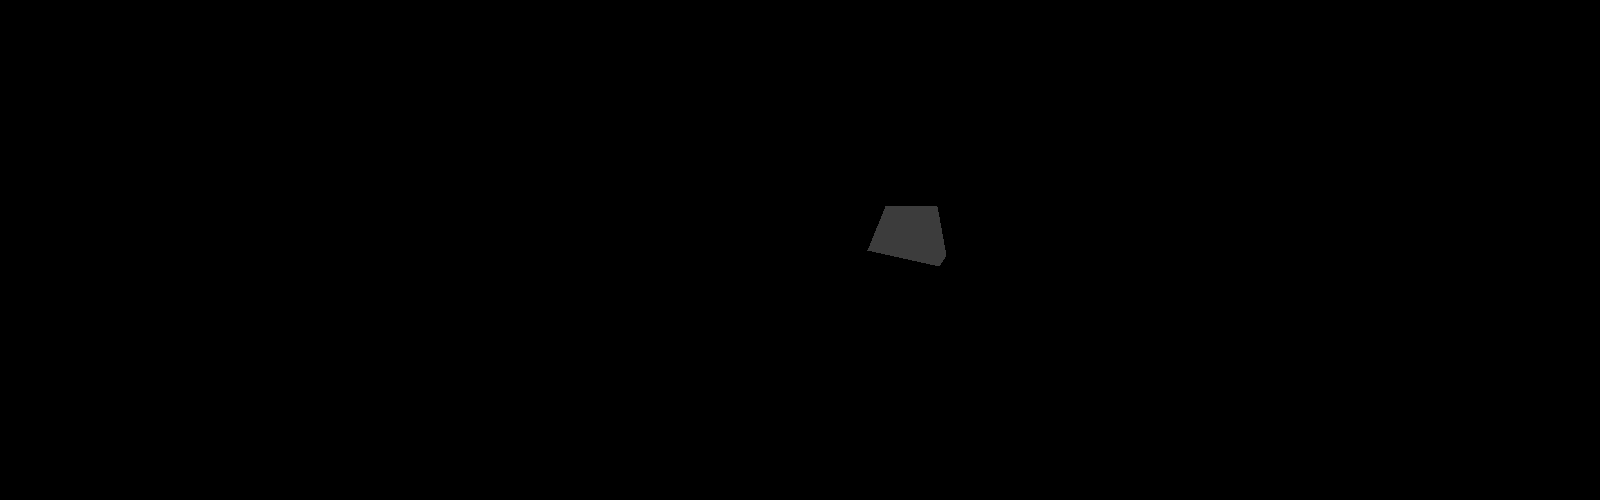

In [62]:
mask_2=np.copy(mask)
mask_idx=mask_2[:,:,0]
mask_idx[mask_idx==2]=3
w_seg.setMask(mask_2)

print("Mask unique values :",np.unique(mask_2[:,:,0]))

pImage.fromarray(mask_2[:,:,0]*20)


### Modification verification

Mask shape: (500, 1600, 4)
Mask unique values : [0 3]


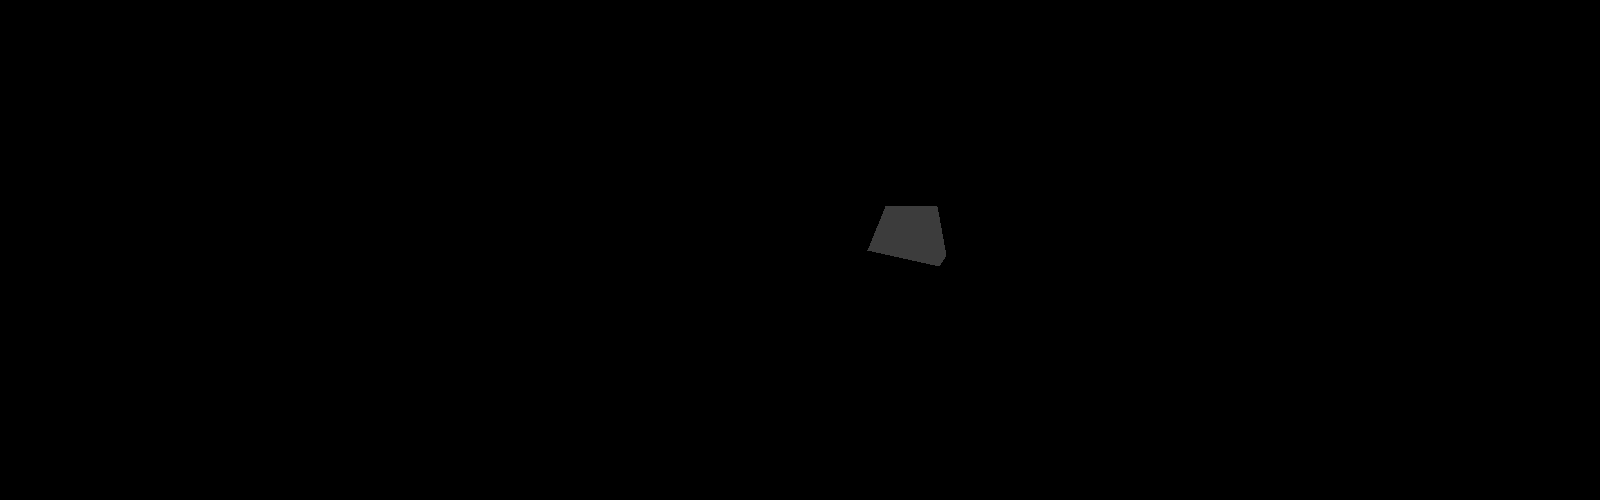

In [63]:

mask_verif=w_seg.getMask()

# for each pixel we got 4 values : [idx, indice_instance_1, indice_instance_2, 255]
print("Mask shape:",mask_verif.shape)
print("Mask unique values :",np.unique(mask_verif[:,:,0]))

pImage.fromarray(im_verif[:,:,0]*20)

# Observe changes

The following example shows how to observe changes on ```annotations``` and ```selectedIds```  and call functions displaying the list of annotations and selected items.

Create somes annotations and  select them to see changes displayed below the element.

In [42]:
from ipywidgets import Label,VBox,Output
from IPython.display import clear_output

mode="shape"

if mode=="segmentation":
    w_pixano = Pixano(element='smart-segmentation',image='image.jpg',label_schema=my_schema_seg)
else:
    w_pixano = Pixano(element='pxn-smart-rectangle',image='image.jpg',label_schema=my_schema_shape)

    
out=Output()
out2=Output()
    
def on_shapes_change(change):
    with out:
        clear_output(wait=True)
        if  "new" in change:
            print("Elements list :")
            annotations=change['new']
            for s in annotations:
                category=s['category']
                vertices=s["geometry"]["vertices"] 
                vertices_str=",".join(list(map(lambda x:"{:.2f}".format(x),vertices)))
                print("ID: "+s['id']+ ", Category : "+category+", Vertices :"+vertices_str )    
        else:
            selected.value="Shape selected : None"
            
def on_select_change(change):
    with out2:
        clear_output(wait=True)
        if "new" in change:
            print("Element selected :",change['new'])
            
if mode=="shape":      
    w_pixano.observe(on_shapes_change, names='annotations')
    
w_pixano.observe(on_select_change, names='selectedIds')

VBox([w_pixano,out,out2])

# Custom smart segmentation

With ```smart-segmentation-python``` element is it possible to set a custom smart segmentation funcntio in python by using ```prediction_function``` of Pixano

This function has 2 arguments :
- crop, an array containing the image crop selected in pixano,
- roi an array containing the coordinates of the selected roi.

This function must return a 2 dim uint8 array of the binary computed mask

In [7]:
from u2net import *
import torch
from torchvision import transforms
import numpy as np
from ipywidgets import Output
net = U2NETP(3,1)

state_dict=torch.load("u2netp.pth",map_location='cpu')
net.load_state_dict(state_dict)
if torch.cuda.is_available():    net.cuda()
net=net.eval();
img_size=256
norm=transforms.Normalize(mean = (0.485, 0.456, 0.406), std = (0.229, 0.224, 0.225))
toTensor=transforms.ToTensor()

out=Output()
@out.capture()
def predict(crop,roi):
    h,w=crop.shape[:2]
    image_in=cv2.resize(crop,(img_size,img_size),cv2.INTER_LINEAR)
    image_torch=toTensor(image_in)
    image_torch=norm(image_torch).unsqueeze(0)
    with torch.no_grad():
        output,*_ =net(image_torch)
        output=output.numpy()
        output=cv2.resize(output[0],(w,h),cv2.INTER_LINEAR)
        output=(output>0.5).astype(np.uint8)
        return output
        
w_pixano = Pixano(element='smart-segmentation-python',image='image.jpg',label_schema=my_schema_seg)
w_pixano.predict_function=predict
display(out)
w_pixano

Output()

Pixano(annotations_input=[0], element='pxn-smart-segmentation-python', image='/9j/4AAQSkZJRgABAQAAAQABAAD/2wCE…